<a href="https://colab.research.google.com/github/ayush31o5/HTP_project/blob/main/gbdt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

def compute_gradient(y, prediction):
    return [y_val - prediction for y_val in y]

def benchmark_sequential(n_samples):
    y = np.random.rand(n_samples)
    prediction = np.mean(y)

    start = time.time()
    gradients = compute_gradient(y, prediction)
    end = time.time()

    return end - start


In [ ]:
dataset_sizes = [
    10_000, 50_000, 100_000, 250_000, 500_000,
    750_000, 1_000_000, 1_250_000, 1_500_000, 1_750_000,
    2_000_000, 2_500_000, 3_000_000, 3_500_000
]

sequential_times = []

for size in dataset_sizes:
    print(f"Running sequential computation for dataset size: {size}")
    elapsed_time = benchmark_sequential(size)
    sequential_times.append(elapsed_time)
    print(f"Time taken: {elapsed_time:.4f} seconds\n")


Running sequential computation for dataset size: 10000
Time taken: 0.0011 seconds

Running sequential computation for dataset size: 50000
Time taken: 0.0082 seconds

Running sequential computation for dataset size: 100000
Time taken: 0.0128 seconds

Running sequential computation for dataset size: 250000
Time taken: 0.0300 seconds

Running sequential computation for dataset size: 500000
Time taken: 0.0555 seconds

Running sequential computation for dataset size: 750000
Time taken: 0.0925 seconds

Running sequential computation for dataset size: 1000000
Time taken: 0.1094 seconds

Running sequential computation for dataset size: 1250000
Time taken: 0.1424 seconds

Running sequential computation for dataset size: 1500000
Time taken: 0.1651 seconds

Running sequential computation for dataset size: 1750000
Time taken: 0.1994 seconds

Running sequential computation for dataset size: 2000000
Time taken: 0.2449 seconds

Running sequential computation for dataset size: 2500000
Time taken: 0.29

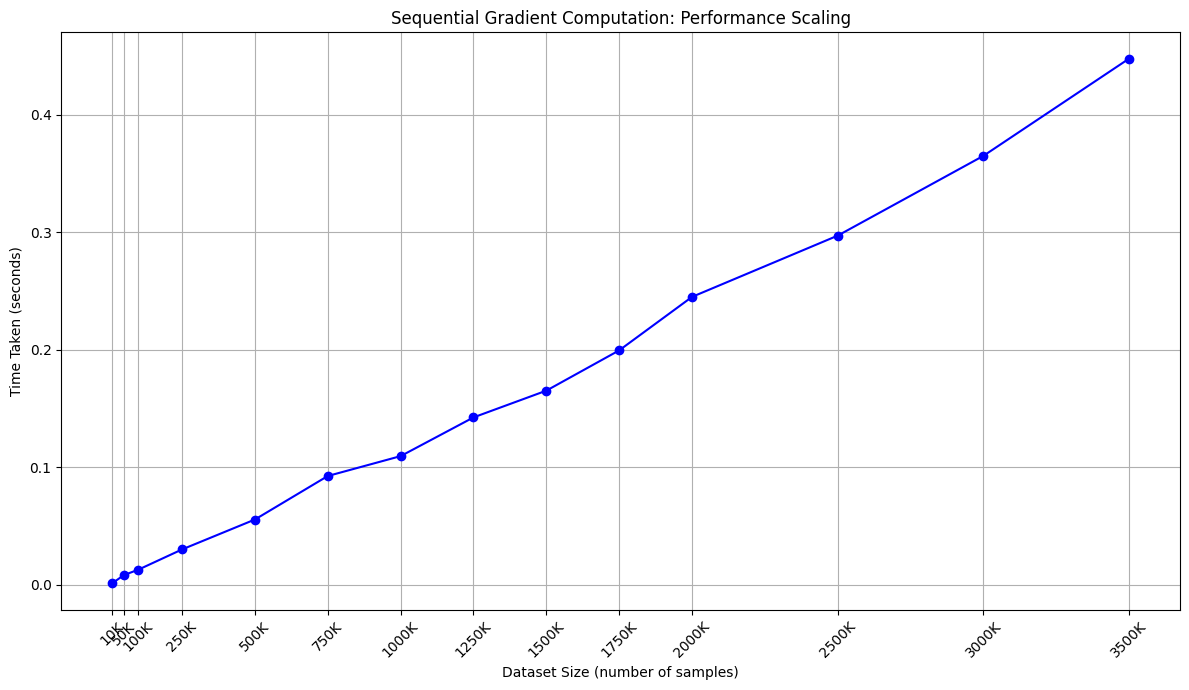

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(dataset_sizes, sequential_times, marker='o', linestyle='-', color='b')
plt.title('Sequential Gradient Computation: Performance Scaling')
plt.xlabel('Dataset Size (number of samples)')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.xticks(dataset_sizes, [f"{size//1000}K" for size in dataset_sizes], rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Remove all existing CuPy versions
!pip uninstall cupy-cuda11x cupy-cuda12x cupy -y

# Install the CuPy version exactly compatible with Colab's current CUDA version
!pip install cupy-cuda12x -q --no-cache-dir

# Fix library path issues explicitly
import os
os.environ['LD_LIBRARY_PATH'] = '/usr/local/cuda/lib64:' + os.environ.get('LD_LIBRARY_PATH', '')

import cupy as cp
print("CuPy version:", cp.__version__)
print("GPUs found:", cp.cuda.runtime.getDeviceCount())



Found existing installation: cupy-cuda12x 13.4.1
Uninstalling cupy-cuda12x-13.4.1:
  Successfully uninstalled cupy-cuda12x-13.4.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 MB 290.3 MB/s eta 0:00:00
CuPy version: 13.4.1
GPUs found: 1


In [ ]:
import cupy as cp
import time

def compute_gradient_gpu(y_gpu, prediction):
    return y_gpu - prediction

def benchmark_parallel_gpu(n_samples):
    y_gpu = cp.random.rand(n_samples)
    prediction = cp.mean(y_gpu)

    cp.cuda.Stream.null.synchronize()
    start = time.time()
    gradients_gpu = compute_gradient_gpu(y_gpu, prediction)
    cp.cuda.Stream.null.synchronize()
    end = time.time()

    return end - start

size = 1_000_000
elapsed_time = benchmark_parallel_gpu(size)
print(f"GPU gradient computation for {size} samples took {elapsed_time:.6f} seconds")


GPU gradient computation for 1000000 samples took 0.000462 seconds


In [ ]:
dataset_sizes = [
    10_000, 50_000, 100_000, 250_000, 500_000,
    750_000, 1_000_000, 1_250_000, 1_500_000, 1_750_000,
    2_000_000, 2_500_000, 3_000_000, 3_500_000
]

gpu_times = []

for size in dataset_sizes:
    print(f"Running GPU computation for dataset size: {size}")
    elapsed_time = benchmark_parallel_gpu(size)
    gpu_times.append(elapsed_time)
    print(f"GPU Time taken: {elapsed_time:.4f} seconds\n")


Running GPU computation for dataset size: 10000
GPU Time taken: 0.0002 seconds

Running GPU computation for dataset size: 50000
GPU Time taken: 0.0001 seconds

Running GPU computation for dataset size: 100000
GPU Time taken: 0.0000 seconds

Running GPU computation for dataset size: 250000
GPU Time taken: 0.0001 seconds

Running GPU computation for dataset size: 500000
GPU Time taken: 0.0001 seconds

Running GPU computation for dataset size: 750000
GPU Time taken: 0.0001 seconds

Running GPU computation for dataset size: 1000000
GPU Time taken: 0.0001 seconds

Running GPU computation for dataset size: 1250000
GPU Time taken: 0.0001 seconds

Running GPU computation for dataset size: 1500000
GPU Time taken: 0.0001 seconds

Running GPU computation for dataset size: 1750000
GPU Time taken: 0.0001 seconds

Running GPU computation for dataset size: 2000000
GPU Time taken: 0.0001 seconds

Running GPU computation for dataset size: 2500000
GPU Time taken: 0.0002 seconds

Running GPU computation 

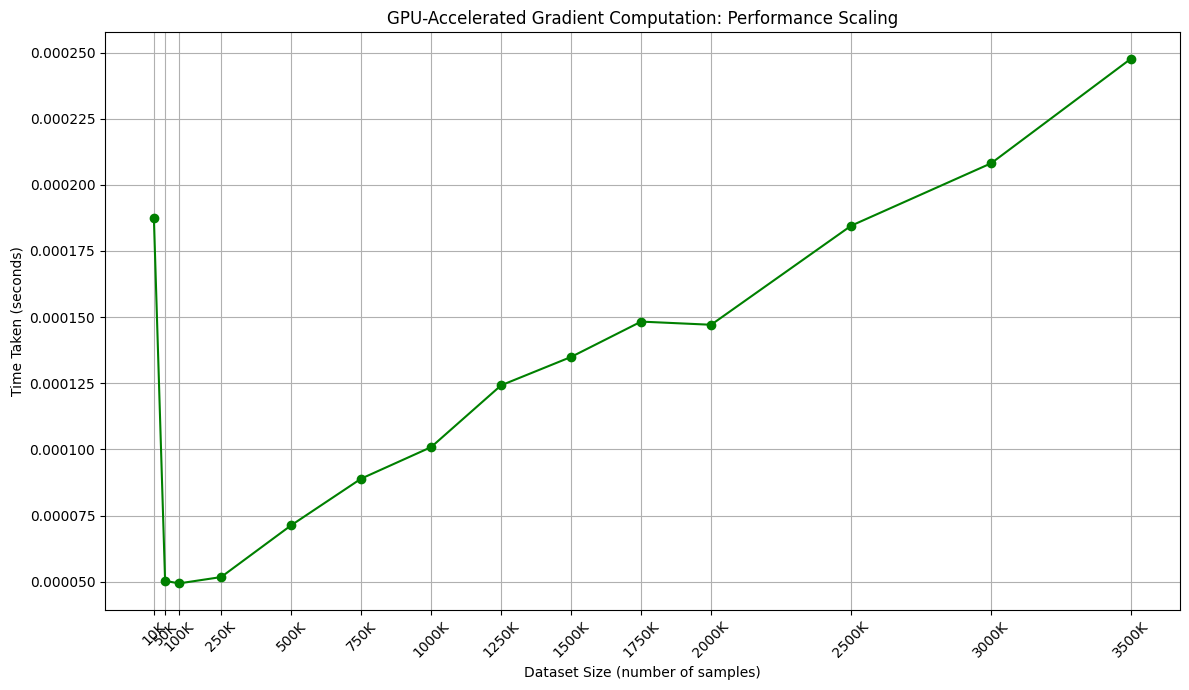

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(dataset_sizes, gpu_times, marker='o', linestyle='-', color='green')
plt.title('GPU-Accelerated Gradient Computation: Performance Scaling')
plt.xlabel('Dataset Size (number of samples)')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.xticks(dataset_sizes, [f"{size//1000}K" for size in dataset_sizes], rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
!nvcc --version


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [13]:
%%writefile sequential_gradient.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

void compute_gradient(double *y, double prediction, double *gradients, int n_samples) {
    for(int i = 0; i < n_samples; i++) {
        gradients[i] = y[i] - prediction;
    }
}

void generate_data(double *y, int n_samples) {
    for(int i = 0; i < n_samples; i++) {
        y[i] = (double)rand() / RAND_MAX;
    }
}

double compute_mean(double *y, int n_samples) {
    double sum = 0.0;
    for(int i = 0; i < n_samples; i++) {
        sum += y[i];
    }
    return sum / n_samples;
}

int main() {
    srand(time(NULL));
    int n_samples = 100000000;

    double *y = (double*)malloc(n_samples * sizeof(double));
    double *gradients = (double*)malloc(n_samples * sizeof(double));

    generate_data(y, n_samples);
    double prediction = compute_mean(y, n_samples);

    clock_t start = clock();
    compute_gradient(y, prediction, gradients, n_samples);
    clock_t end = clock();

    double elapsed_time = (double)(end - start) / CLOCKS_PER_SEC;
    printf("Sequential computation took %.4f seconds\n", elapsed_time);

    free(y);
    free(gradients);

    return 0;
}


Overwriting sequential_gradient.c


In [14]:
!gcc sequential_gradient.c -o sequential_gradient


In [15]:
!./sequential_gradient


Sequential computation took 0.6334 seconds


In [10]:
%%writefile cuda_gradient_benchmark.cu
#include <stdio.h>
#include <stdlib.h>
#include <cuda_runtime.h>
#include <time.h>

__global__ void compute_gradient(double *y, double prediction, double *gradients, int n_samples) {
    int idx = blockIdx.x * blockDim.x + threadIdx.x;
    if (idx < n_samples) {
        gradients[idx] = y[idx] - prediction;
    }
}

void generate_data(double *y, int n_samples) {
    for(int i = 0; i < n_samples; i++) {
        y[i] = (double)rand() / RAND_MAX;
    }
}

double compute_mean(double *y, int n_samples) {
    double sum = 0.0;
    for(int i = 0; i < n_samples; i++) {
        sum += y[i];
    }
    return sum / n_samples;
}

int main() {
    srand(time(NULL));
    int n_samples = 100000000;

    size_t size = n_samples * sizeof(double);
    double *h_y = (double*)malloc(size);
    double *h_gradients = (double*)malloc(size);

    generate_data(h_y, n_samples);
    double prediction = compute_mean(h_y, n_samples);

    double *d_y, *d_gradients;
    cudaMalloc((void**)&d_y, size);
    cudaMalloc((void**)&d_gradients, size);
    cudaMemcpy(d_y, h_y, size, cudaMemcpyHostToDevice);

    int threads_per_block = 256;
    int blocks_per_grid = (n_samples + threads_per_block - 1) / threads_per_block;

    cudaEvent_t start, stop;
    cudaEventCreate(&start);
    cudaEventCreate(&stop);

    cudaEventRecord(start);
    compute_gradient<<<blocks_per_grid, threads_per_block>>>(d_y, prediction, d_gradients, n_samples);
    cudaEventRecord(stop);

    cudaEventSynchronize(stop);
    float milliseconds = 0;
    cudaEventElapsedTime(&milliseconds, start, stop);

    printf("CUDA parallel computation took %.4f milliseconds\n", milliseconds);

    cudaFree(d_y);
    cudaFree(d_gradients);
    free(h_y);
    free(h_gradients);
    cudaEventDestroy(start);
    cudaEventDestroy(stop);

    return 0;
}


Overwriting cuda_gradient_benchmark.cu


In [11]:
!nvcc cuda_gradient_benchmark.cu -o cuda_gradient_benchmark


In [12]:
!./cuda_gradient_benchmark


CUDA parallel computation took 7.6763 milliseconds
